# Benchmarks notebook

## Liquid Electrolyte 

BigMap collabolarion

Test trajectory `traj_2.1.xyz` with a total of `68001` frames and `8402` atoms.

# QUIPPY - ASE

In [1]:
import numpy as np
import time
import sys
# import ase
from tqdm import tqdm
from ase.io import read, write
from quippy import descriptors
import matplotlib.pyplot as plt

In [2]:
sys.path.append('../../')

In [3]:
from src import myTools, plotTools

In [4]:
sysdir_path = '/mnt/c/Users/andre/Documenti/Work/1.Cambridge/0.systems/1.ioanSystems/data/LiquidElectrolyte/'
sysname = 'traj_2.1.xyz'

In [20]:
# traj_chunk = [1,2,5,10,20]
traj_chunk = [100,500,1000,2000,4000]
Ntot_frames = 68001

## ASE - traj reader

In [21]:
def timed_traj_reader(sys_traj, chunk, single_frame=False, verbose=True):
    t0 = time.time()
    if single_frame:
        traj_ = read(sys_traj, index=str(chunk-1)+':'+str(chunk))
    else:
        traj_ = read(sys_traj, index='0:'+str(chunk))
    t1 = time.time()
    T = np.around((t1-t0),2)
    if verbose:
        print(f'time={T}s')
    return traj_ , T

### Reading a single frame

In [22]:
# frame1, _ = timed_traj_reader(sys_traj=sysdir_path+sysname, 
#                               chunk=1, single_frame=True)

In [23]:
# read(sysdir_path+sysname,index=':1')[0].info

In [24]:
comp_time_sfr = list()
frame_list = list()
for frames in traj_chunk:
    f, t = timed_traj_reader(sys_traj=sysdir_path+sysname,
                             chunk=frames, single_frame=True)
    comp_time_sfr.append(t)
    frame_list.append(f[0])

time=0.71s
time=3.22s
time=5.94s
time=12.02s
time=22.58s


In [25]:
[f.info for f in frame_list]

[{'Time': 148.5},
 {'Time': 748.5},
 {'Time': 1498.5},
 {'Time': 2998.5},
 {'Time': 5998.5}]

### Reading chuncks of frames

In [26]:
comp_time_chunk = list()
bundle_list = list()
for frames in traj_chunk:
    f, t = timed_traj_reader(sys_traj=sysdir_path+sysname,
                             chunk=frames, single_frame=False)
    print(frames, len(f))
    comp_time_chunk.append(t)
    bundle_list.append(f[0])

time=3.53s
100 100
time=17.29s
500 500
time=33.69s
1000 1000
time=65.64s
2000 2000
time=132.5s
4000 4000


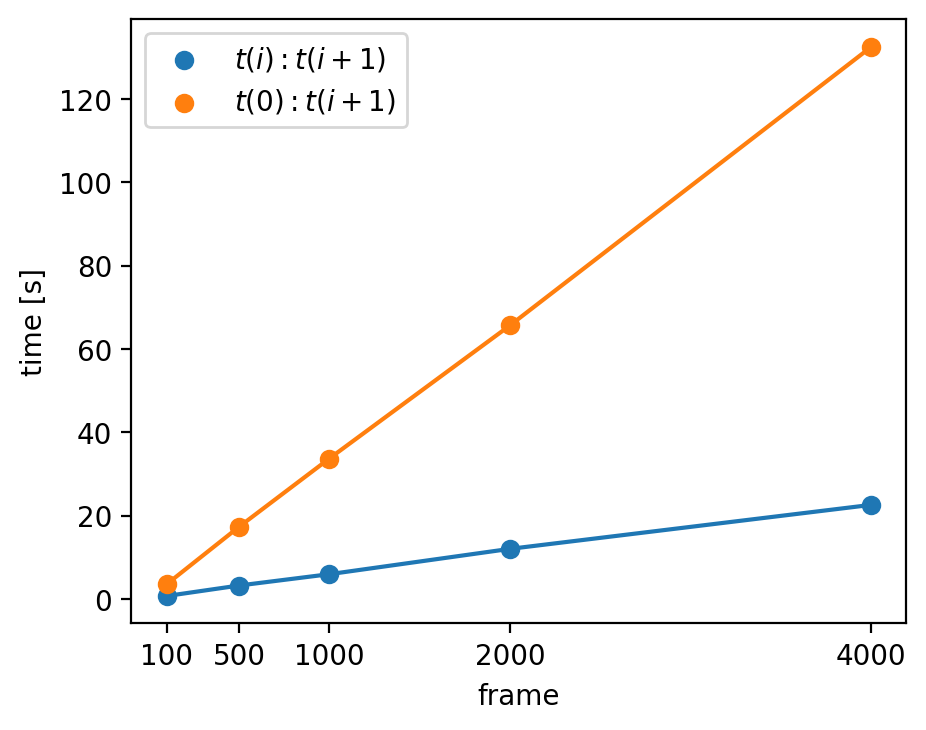

In [27]:
fig, ax = plotTools.get_axes(1)
ax.plot(traj_chunk,comp_time_sfr)
ax.scatter(traj_chunk,comp_time_sfr, label=r'$t(i):t(i+1)$', zorder=3)
ax.plot(traj_chunk,comp_time_chunk)
ax.scatter(traj_chunk,comp_time_chunk, label=r'$t(0):t(i+1)$', zorder=3)
ax.set_xlabel('frame')
ax.set_xticks(traj_chunk)
ax.set_ylabel('time [s]')
ax.legend()
fig.savefig("benchmarks_1", transparent=True)

In [15]:
bundle_list[0].info

{'Time': 0.0}

## Howto improve

In [8]:
t,it = np.loadtxt('./benchmarks_frame_by_frame.dat', unpack=True)

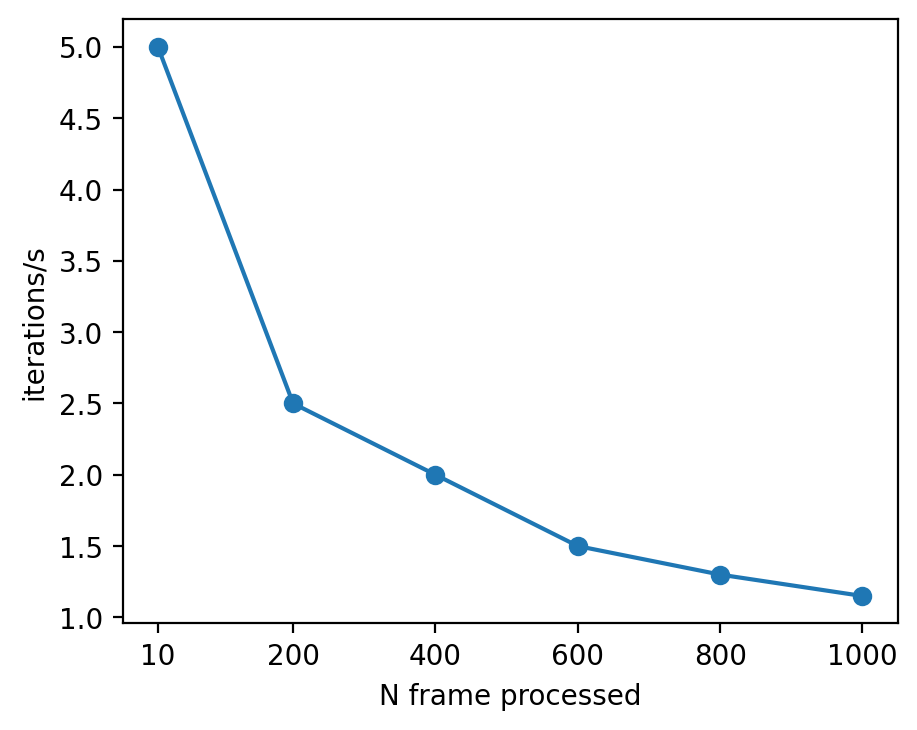

In [10]:
fig, ax = plotTools.get_axes(1)
ax.plot(t,it)
ax.scatter(t,it, zorder=3)
ax.set_xlabel('N frame processed')
ax.set_xticks(t)
ax.set_ylabel('iterations/s')
fig.savefig("benchmarks_2", transparent=True)